# Imports

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Förbered och ladda data

In [2]:
# URL to the CSV file

# 2019 Dataset - Loan/Application Records (LAR)
url = 'https://s3.amazonaws.com/cfpb-hmda-public/prod/three-year-data/2019/2019_public_lar_three_year_csv.zip'

# See information about data fields of the original dataset here:
# https://ffiec.cfpb.gov/documentation/publications/loan-level-datasets/lar-data-fields

# EDA

## Get the first n rows of data from the URL

In [3]:
# Specify the number of rows to read
num_rows_to_read = 10000

In [4]:
# Specify the columns to get.
# removed columns: {"lei", "business_or_commercial_purpose: 1"}

column_data_types = {
    'activity_year': 'int64',
    'derived_msa_md': 'float64',
    'state_code': 'object',
    'county_code': 'float64',
    'census_tract': 'float64',
    'conforming_loan_limit': 'object',
    'derived_loan_product_type': 'object',
    'derived_dwelling_category': 'object',
    'derived_ethnicity': 'object',
    'derived_race': 'object',
    'derived_sex': 'object',
    'action_taken': 'int64',
    'purchaser_type': 'int64',
    'preapproval': 'int64',
    'loan_type': 'int64',
    'loan_purpose': 'int64',
    'lien_status': 'int64',
    'reverse_mortgage': 'int64',
    'open_end_line_of_credit': 'int64' , 
    'loan_amount': 'int64' , 
    'combined_loan_to_value_ratio': 'float64',
    'interest_rate': 'float64',
    'rate_spread': 'float64',
    'hoepa_status': 'int64', 
    'total_loan_costs': 'float64',
    'total_points_and_fees': 'float64',
    'origination_charges': 'float64',
    'discount_points': 'float64',
    'lender_credits': 'float64',
    'loan_term': 'float64',
    'prepayment_penalty_term': 'float64',
    'intro_rate_period': 'float64',
    'negative_amortization': 'int64',
    'interest_only_payment': 'int64',
    'balloon_payment': 'int64',
    'other_nonamortizing_features': 'int64',
    'property_value': 'float64',
    'construction_method': 'int64', 
    'occupancy_type': 'int64',
    'manufactured_home_secured_property_type': 'int64',
    'manufactured_home_land_property_interest': 'int64',
    'total_units': 'object',
    'multifamily_affordable_units': 'float64',
    'income': 'float64',
    'debt_to_income_ratio': 'object',
    'applicant_credit_score_type': 'int64',
    'co_applicant_credit_score_type': 'int64',
    'applicant_ethnicity_1': 'float64',
    'applicant_ethnicity_2': 'float64',
    'applicant_ethnicity_3': 'float64',
    'applicant_ethnicity_4': 'float64',
    'applicant_ethnicity_5': 'float64',
    'co_applicant_ethnicity_1': 'float64',
    'co_applicant_ethnicity_2': 'float64',
    'co_applicant_ethnicity_3': 'float64',
    'co_applicant_ethnicity_4': 'float64',
    'co_applicant_ethnicity_5': 'float64',
    'applicant_ethnicity_observed': 'int64',
    'co_applicant_ethnicity_observed': 'int64',
    'applicant_race_1': 'float64',
    'applicant_race_2': 'float64',
    'applicant_race_3': 'float64',
    'applicant_race_4': 'float64',
    'applicant_race_5': 'float64',
    'co_applicant_race_1': 'int64',
    'co_applicant_race_2': 'float64',
    'co_applicant_race_3': 'float64',
    'co_applicant_race_4': 'float64',
    'co_applicant_race_5': 'float64',
    'applicant_race_observed': 'int64',
    'co_applicant_race_observed': 'int64',
    'applicant_sex': 'int64',
    'co_applicant_sex': 'int64',
    'applicant_sex_observed': 'int64',
    'co_applicant_sex_observed': 'int64',
    'applicant_age': 'object',
    'co_applicant_age': 'object',
    'applicant_age_above_62': 'object',
    'co_applicant_age_above_62': 'object',
    'submission_of_application': 'int64',
    'initially_payable_to_institution': 'int64',
    'aus_1': 'int64',
    'aus_2': 'float64',
    'aus_3': 'float64',
    'aus_4': 'float64',
    'aus_5': 'float64',
    'denial_reason_1': 'int64',
    'denial_reason_2': 'float64',
    'denial_reason_3': 'float64',
    'denial_reason_4': 'float64',
    'tract_population': 'int64',
    'tract_minority_population_percent': 'float64',
    'ffiec_msa_md_median_family_income': 'int64',
    'tract_to_msa_income_percentage': 'float64',
    'tract_owner_occupied_units': 'int64',
    'tract_one_to_four_family_homes': 'int64',
    'tract_median_age_of_housing_units': 'int64',
}

In [5]:
# Read the CSV file with specified data types
data = pd.read_csv(url, nrows=num_rows_to_read, dtype=column_data_types)

## Data info

In [6]:
# Print column info
print("Column info:")
print(data.info())

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 99 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   activity_year                             10000 non-null  int64  
 1   lei                                       10000 non-null  object 
 2   derived_msa_md                            688 non-null    float64
 3   state_code                                9998 non-null   object 
 4   county_code                               9998 non-null   float64
 5   census_tract                              9998 non-null   float64
 6   conforming_loan_limit                     9999 non-null   object 
 7   derived_loan_product_type                 10000 non-null  object 
 8   derived_dwelling_category                 10000 non-null  object 
 9   derived_ethnicity                         10000 non-null  object 
 10  derived_race          

## Data statistics

In [7]:
# Print column statistics
print("Column statistics:")
print(data.describe())

Column statistics:
       activity_year  derived_msa_md   county_code  census_tract  \
count        10000.0      688.000000   9998.000000  9.998000e+03   
mean          2019.0    34301.465116  26038.539408  2.603877e+10   
std              0.0    16126.097734  16218.097286  1.621811e+10   
min           2019.0    10900.000000   1003.000000  1.003011e+09   
25%           2019.0    23224.000000  11001.000000  1.100100e+10   
50%           2019.0    35614.000000  25021.000000  2.502142e+10   
75%           2019.0    38900.000000  39141.000000  3.914196e+10   
max           2019.0    99999.000000  56045.000000  5.604595e+10   

       action_taken  purchaser_type  preapproval     loan_type  loan_purpose  \
count   10000.00000    10000.000000  10000.00000  10000.000000  10000.000000   
mean        3.29110        1.013000      1.99560      1.438300     22.929800   
std         1.91774        2.313388      0.06619      0.695875     13.652601   
min         1.00000        0.000000      1.00000

## Data correlations: Numeric columns

In [8]:
# Print column correlations for numeric columns
numeric_data = data.select_dtypes(include='number')  # Select only numeric columns
print("Column correlations:")
print(numeric_data.corr())

Column correlations:
                                   activity_year  derived_msa_md  county_code  \
activity_year                                NaN             NaN          NaN   
derived_msa_md                               NaN        1.000000     0.096226   
county_code                                  NaN        0.096226     1.000000   
census_tract                                 NaN        0.096226     1.000000   
action_taken                                 NaN        0.054971     0.023591   
...                                          ...             ...          ...   
ffiec_msa_md_median_family_income            NaN       -0.253402     0.064780   
tract_to_msa_income_percentage               NaN       -0.047469    -0.005879   
tract_owner_occupied_units                   NaN       -0.083770     0.049263   
tract_one_to_four_family_homes               NaN        0.023236     0.019987   
tract_median_age_of_housing_units            NaN       -0.007798     0.027961   

      

##  Extract the pairs of columns with the highest positive correlations coefficients. 

In [9]:
# Adjust the number of top correlations to display
num_corr = 30

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Get the highest correlations (excluding self-correlations and duplicates)
highest_correlations = (corr_matrix
                        .stack()
                        .sort_values(ascending=False)
                        .drop_duplicates()
                        .head(num_corr))  

print("Top " + str(num_corr) + " highest positive correlations:")
print(highest_correlations)

Top 30 highest positive correlations:
total_loan_costs                          co_applicant_race_3                        1.000000
derived_msa_md                            derived_msa_md                             1.000000
county_code                               census_tract                               1.000000
loan_amount                               co_applicant_race_3                        0.999966
co_applicant_sex_observed                 co_applicant_race_observed                 0.999744
                                          co_applicant_ethnicity_observed            0.999693
co_applicant_ethnicity_observed           co_applicant_race_observed                 0.999642
co_applicant_race_3                       property_value                             0.999355
                                          income                                     0.990486
co_applicant_race_1                       co_applicant_race_3                        0.977356
co_applicant_race_3   

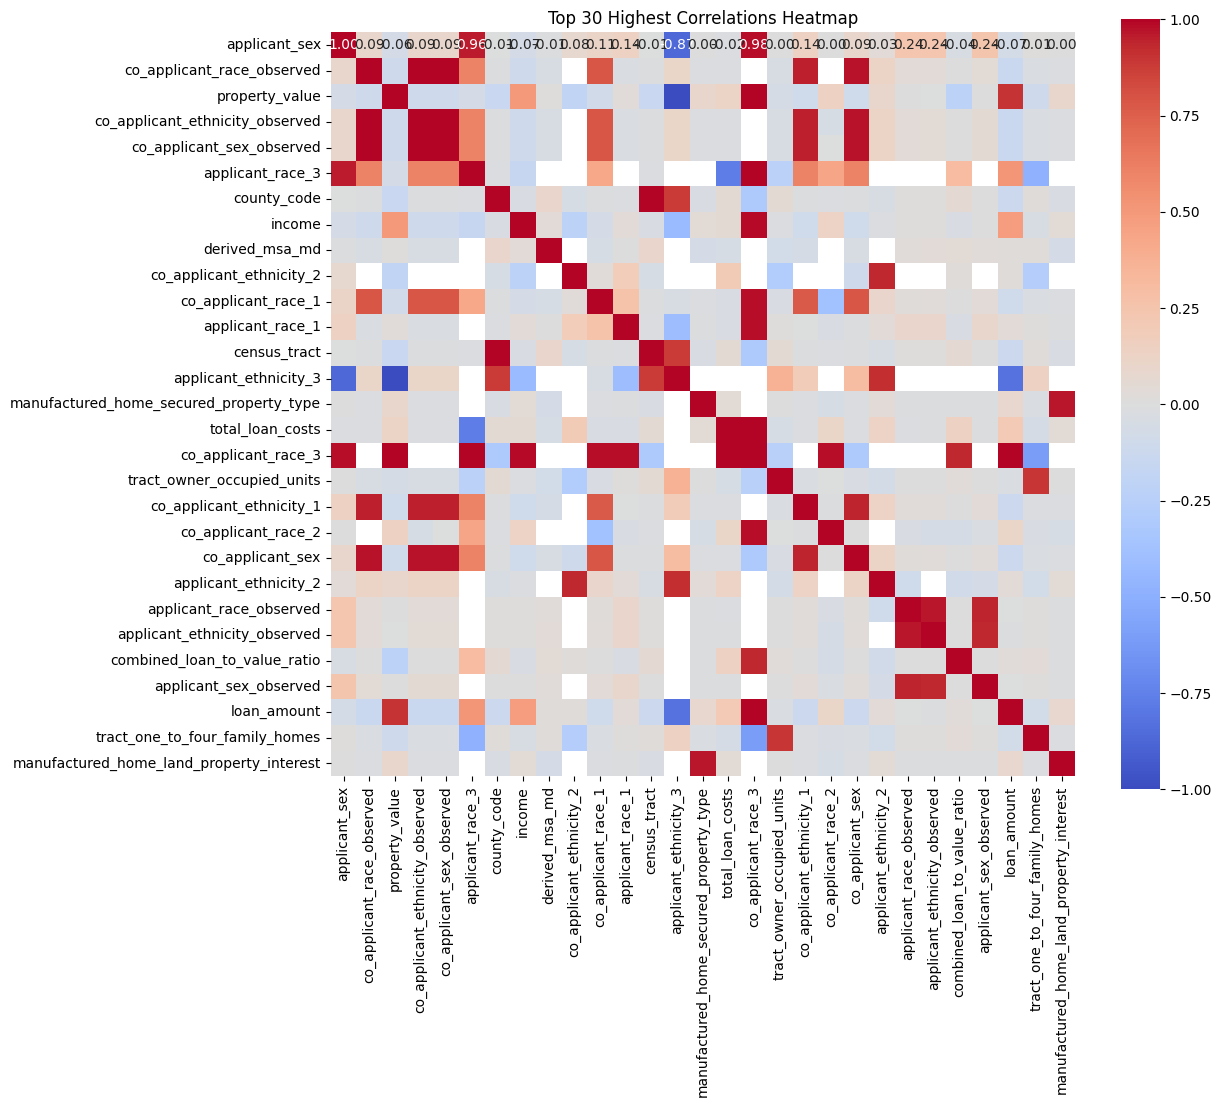

In [10]:
# Ignore the warning related to format strings
warnings.filterwarnings("ignore", category=FutureWarning)

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Get the top n highest correlations (excluding self-correlations and duplicates)
highest_correlations = (corr_matrix
                        .stack()
                        .sort_values(ascending=False)
                        .drop_duplicates()
                        .head(num_corr))

# Reset the index to access the correlation matrix correctly
highest_correlations = highest_correlations.reset_index()

# Extract unique column names for display
columns_to_display = list(set(highest_correlations['level_0']).union(set(highest_correlations['level_1'])))

# Select the relevant subset of the correlation matrix based on the highest correlations
subset_corr_matrix = corr_matrix.loc[columns_to_display, columns_to_display]

# Create a heatmap for the subset of the correlation matrix
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(subset_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)

# Add a title
plt.title('Top {} Highest Correlations Heatmap'.format(num_corr))

# Display the plot
plt.show()

##  Extract the pairs of columns with the highest negative correlations coefficients. 

In [11]:
# Ignore the warning related to format strings
warnings.filterwarnings("ignore", category=FutureWarning)

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Get the highest correlations (excluding self-correlations and duplicates)
highest_correlations = (corr_matrix
                        .stack()
                        .sort_values(ascending=False)
                        .drop_duplicates()
                        .head(num_corr))

# Get the lowest correlations (excluding self-correlations and duplicates)
lowest_correlations = (corr_matrix
                        .stack()
                        .sort_values(ascending=True)
                        .drop_duplicates()
                        .head(num_corr))

print("\nTop {} lowest correlations:".format(num_corr))
print(lowest_correlations)


Top 30 lowest correlations:
interest_rate               co_applicant_race_3                        -1.000000
applicant_ethnicity_3       property_value                             -1.000000
lender_credits              applicant_race_3                           -1.000000
construction_method         manufactured_home_land_property_interest   -0.995618
                            manufactured_home_secured_property_type    -0.967062
interest_only_payment       applicant_race_3                           -0.957841
aus_1                       aus_3                                      -0.905005
applicant_sex               applicant_ethnicity_3                      -0.875000
intro_rate_period           applicant_race_2                           -0.836044
applicant_ethnicity_3       loan_amount                                -0.827611
tract_population            co_applicant_race_3                        -0.785585
total_loan_costs            applicant_race_3                           -0.772575

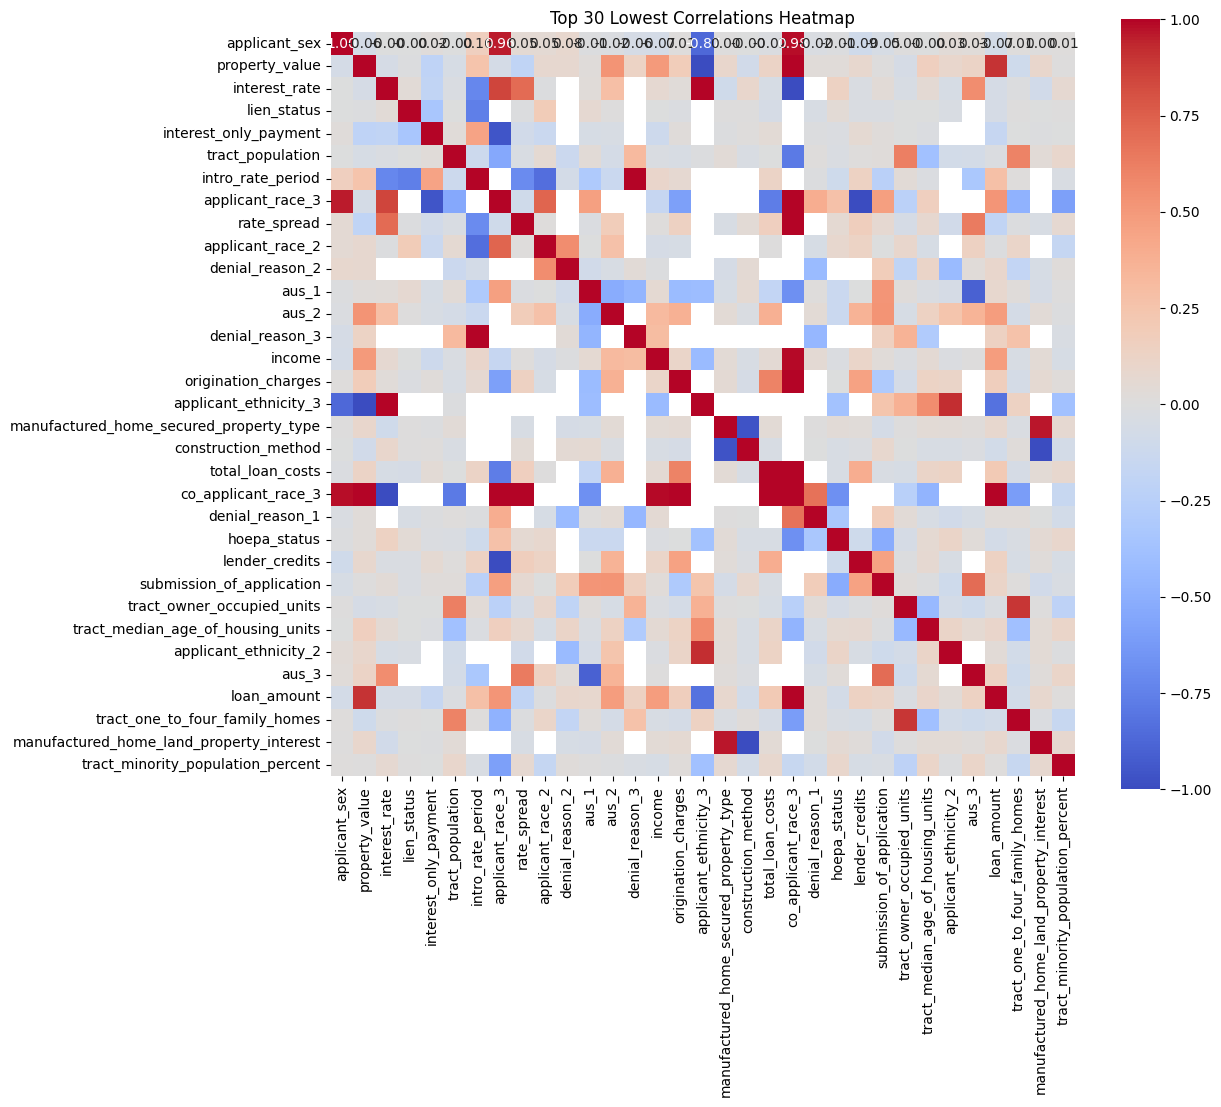

In [12]:
# Ignore the warning related to format strings
warnings.filterwarnings("ignore", category=FutureWarning)

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Get the lowest correlations (excluding self-correlations and duplicates)
lowest_correlations = (corr_matrix
                        .stack()
                        .sort_values(ascending=True)
                        .drop_duplicates()
                        .head(num_corr))

# Reset the index to access the correlation matrix correctly
lowest_correlations = lowest_correlations.reset_index()

# Extract unique column names for display
columns_to_display = list(set(lowest_correlations['level_0']).union(set(lowest_correlations['level_1'])))

# Select the relevant subset of the correlation matrix based on the lowest correlations
subset_corr_matrix = corr_matrix.loc[columns_to_display, columns_to_display]

# Create a heatmap for the subset of the correlation matrix
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(subset_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)

# Add a title
plt.title('Top {} Lowest Correlations Heatmap'.format(num_corr))

# Display the plot
plt.show()

## Loans accepted or denialed

In [13]:
# Print unique values and counts for action_taken
print("Unique values and counts for action_taken:")
print(data['action_taken'].value_counts())

Unique values and counts for action_taken:
action_taken
1    3349
4    2664
6    2144
3     967
5     463
2     413
Name: count, dtype: int64


### Values for 'action_taken'
1. Loan originated
2. Application approved but not accepted
3. Application denied
4. Application withdrawn by applicant
5. File closed for incompleteness
6. Purchased loan
7. Preapproval request denied
8. Preapproval request approved but not accepted


In [14]:
# Print unique values and counts for denial_reason columns
denial_reason_columns = ['denial_reason_1', 'denial_reason_2', 'denial_reason_3', 'denial_reason_4']
for col in denial_reason_columns:
    print(f"\nUnique values and counts for {col}:")
    print(data[col].value_counts())


Unique values and counts for denial_reason_1:
denial_reason_1
10    9033
3      325
1      267
4      119
7      108
9       71
6       41
5       19
2       17
Name: count, dtype: int64

Unique values and counts for denial_reason_2:
denial_reason_2
3.0    37
9.0    25
1.0    24
6.0    14
5.0    11
4.0     7
7.0     4
2.0     3
Name: count, dtype: int64

Unique values and counts for denial_reason_3:
denial_reason_3
5.0    7
1.0    6
9.0    4
2.0    1
4.0    1
3.0    1
6.0    1
Name: count, dtype: int64

Unique values and counts for denial_reason_4:
Series([], Name: count, dtype: int64)


### Values for 'denial_reason_1', 'denial_reason_2', 'denial_reason_3'
1. Debt-to-income ratio
2. Employment history
3. Credit history
4. Collateral
5. Insufficient cash (down payment, closing costs)
6. Unverifiable information
7. Credit application incomplete
8. Mortgage insurance denied
9. Other
10. Not applicable

## Key data fields that examiners will use to verify the accuracy of the HMDA

The following table lists the key data fields that examiners will use to verify the accuracy of the HMDA Loan/Application Register (LAR) 
for banks that are full HMDA reporters and separately for banks that qualify for the partial exemption.

https://www.occ.gov/news-issuances/bulletins/2019/bulletin-2019-12.html

In [15]:
import pandas as pd

# Data for Key Data Fields That Apply to Full HMDA Reporters
data_full_hmda = {
    'Number': [
        37, 3, 4, 5, 6, 9, 10, 11, 12, 18, 19, 25, 33, 34, 41, 42, 51, 52, 55, 56,
        57, 61, 62, 63, 75, 76, 77, 78, 80, 81, 82, 88, 89, 91, 102, 108, 109, 110
    ],
    'Key Data Fields': [
        'Key Data Fields That Apply to Full HMDA Reporters',
        'Universal Loan Identifier (ULI)',
        'Application Date',
        'Loan Type',
        'Loan Purpose',
        'Occupancy Type',
        'Loan Amount',
        'Action Taken',
        'Action Taken Date',
        'Census Tract',
        'Ethnicity of Applicant or Borrower: 1',
        'Ethnicity of Co-Applicant or Co-Borrower: 1',
        'Race of Applicant or Borrower: 1',
        'Race of Applicant or Borrower: 2',
        'Race of Co-Applicant or Co-Borrower: 1',
        'Race of Co-Applicant or Co-Borrower: 2',
        'Sex of Applicant or Borrower',
        'Sex of Co-Applicant or Co-Borrower',
        'Age of Applicant or Borrower',
        'Age of Co-Applicant or Co-Borrower',
        'Income',
        'Lien Status',
        'Credit Score of Applicant or Borrower',
        'Credit Score of Co-Applicant or Co-Borrower',
        'Origination Charges',
        'Discount Points',
        'Lender Credits',
        'Interest Rate',
        'Debt-to-Income Ratio',
        'Combined Loan-To-Value Ratio',
        'Loan Term',
        'Property Value',
        'Manufactured Home Secured Property Type',
        'Total Units',
        'Automated Underwriting System Result: 1',
        'Reverse Mortgage',
        'Open-End Line of Credit',
        'Business or Commercial Purpose'
    ]
}

# Data for Key Data Fields That Apply to Banks That Qualify for the Partial Exemption
data_partial_exemption = {
    'Number': [
        21, 4, 5, 6, 9, 10, 11, 12, 18, 19, 25, 33, 34, 41, 42, 51, 52, 55, 56, 57,
        61, 91
    ],
    'Key Data Fields': [
        'Key Data Fields That Apply to Banks That Qualify for the Partial Exemption',
        'Application Date',
        'Loan Type',
        'Loan Purpose',
        'Occupancy Type',
        'Loan Amount',
        'Action Taken',
        'Action Taken Date',
        'Census Tract',
        'Ethnicity of Applicant or Borrower: 1',
        'Ethnicity of Co-Applicant or Co-Borrower: 1',
        'Race of Applicant or Borrower: 1',
        'Race of Applicant or Borrower: 2',
        'Race of Co-Applicant or Co-Borrower: 1',
        'Race of Co-Applicant or Co-Borrower: 2',
        'Sex of Applicant or Borrower',
        'Sex of Co-Applicant or Co-Borrower',
        'Age of Applicant or Borrower',
        'Age of Co-Applicant or Co-Borrower',
        'Income',
        'Lien Status',
        'Total Units'
    ]
}

# Create DataFrames
df_full_hmda = pd.DataFrame(data_full_hmda)
df_partial_exemption = pd.DataFrame(data_partial_exemption)

# Display the DataFrames
print("DataFrame for Key Data Fields That Apply to Full HMDA Reporters:")
print(df_full_hmda.to_string(index=False))

print("\nDataFrame for Key Data Fields That Apply to Banks That Qualify for the Partial Exemption:")
print(df_partial_exemption.to_string(index=False))


DataFrame for Key Data Fields That Apply to Full HMDA Reporters:
 Number                                   Key Data Fields
     37 Key Data Fields That Apply to Full HMDA Reporters
      3                   Universal Loan Identifier (ULI)
      4                                  Application Date
      5                                         Loan Type
      6                                      Loan Purpose
      9                                    Occupancy Type
     10                                       Loan Amount
     11                                      Action Taken
     12                                 Action Taken Date
     18                                      Census Tract
     19             Ethnicity of Applicant or Borrower: 1
     25       Ethnicity of Co-Applicant or Co-Borrower: 1
     33                  Race of Applicant or Borrower: 1
     34                  Race of Applicant or Borrower: 2
     41            Race of Co-Applicant or Co-Borrower: 1
     42

# Saving the dataframe as csv

In [16]:
# saving the dataframe
# data.to_csv('cleaned_data.csv')